# **Diabetes Prediction**

![alt text](what-is-diabetes-1024x532.png)

## Project Objective 

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

#### Step - 1 import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
import kagglehub
warnings.filterwarnings('ignore')

#### Step - 2 Load Data

In [2]:
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")
print("Path to dataset files:", path)

all_files=os.listdir(path)
display(all_files)
path=path+'/'+all_files[0]
path

Path to dataset files: C:\Users\divya\.cache\kagglehub\datasets\iammustafatz\diabetes-prediction-dataset\versions\1


['diabetes_prediction_dataset.csv']

'C:\\Users\\divya\\.cache\\kagglehub\\datasets\\iammustafatz\\diabetes-prediction-dataset\\versions\\1/diabetes_prediction_dataset.csv'

#### Step - 3 Understanding Data Using EDA

##### Step - 3.1 data cleaning remove unwanted raws

In [3]:
data=pd.read_csv(path)
data.sample(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
19326,Female,37.0,0,0,former,19.85,6.2,126,0
54881,Female,22.0,0,0,current,27.32,6.8,240,1


In [88]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [89]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [91]:
data.shape

(100000, 9)

In [4]:
#checking and droping duplicated rows
duplicated_rows=data[data.duplicated()]
print(f'no. of duplicated rows is {duplicated_rows.shape}')
data=data.drop_duplicates()
print(f'No of rows after droping duplicated rows is {data.shape}')

no. of duplicated rows is (3854, 9)
No of rows after droping duplicated rows is (96146, 9)


<Axes: >

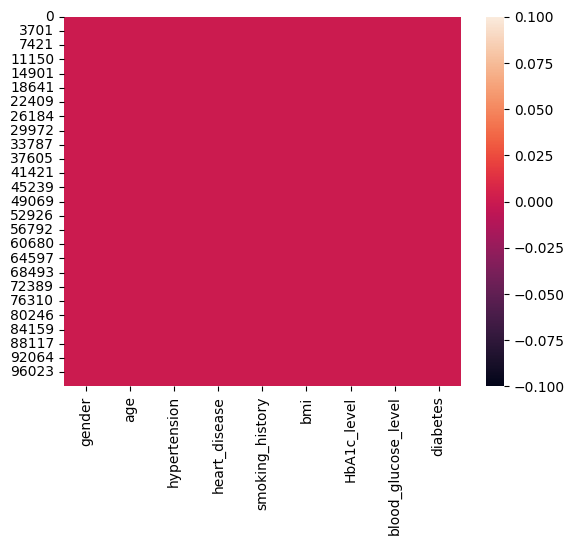

In [93]:
sns.heatmap(data.isnull())

In [94]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

All data is not null however 2 of the rows are object not a number, need to encode them

In [5]:
cols=list(data.columns)
cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [96]:
object_columns=[]
for col in cols:
    if data[col].dtype=='object':
        print(f"Unique values in {col}: {data[col].unique()}")
        object_columns.append(col)
print("Object columns:", object_columns)

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Object columns: ['gender', 'smoking_history']


In [6]:
#Checking the value count of 'gender' and if 'other' is less then droping those rows
print(f'Before Droping\n{data['gender'].value_counts()}')

#it's only 18 so we'll remove the 'other' rows
data=data[data['gender']!='Other']
print(f'\n\nAfter Droping\n{data['gender'].value_counts()}')

Before Droping
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


After Droping
gender
Female    56161
Male      39967
Name: count, dtype: int64


### **Performing EDA Here**

##### Step - 3.2 creating visual representation of data 

In [ ]:
# Histogram for age
plt.hist(data['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
#checking the gender distribution of the dataset
sns.countplot(x='gender', data=data, palette='mako')
plt.title('Gender Distribution')
plt.show()

In [ ]:
#count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(data=data, x=col)
    plt.title(f'{col} Distribution')
    plt.show()

In [ ]:
# Count plot for smoking history
warnings.filterwarnings('ignore')
sns.countplot(x='smoking_history', data=data, palette='mako')
plt.title('Smoking History Distribution')
plt.show()

Bivariant Analysis from here (Visualisation)

In [ ]:
#boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi',hue='gender', data=data)
plt.title('BMI vs Diabetes')
plt.show()

In [ ]:
#boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age',hue='gender', data=data)
plt.title('Age vs Diabetes')
plt.show()

In [ ]:
#count plot of gender vs diabetes
sns.countplot( data=data, x='gender', hue='diabetes')
plt.title('Gender vs Diabetes')
plt.show()

Scatterplot here

In [ ]:
sns.scatterplot(x='age', y='bmi', data=data, hue='diabetes')
plt.show()
#here more diabetes people are with higher age and it seems like their BMI is higher too as they are at the top right of the graph


In [ ]:
#relation between diabetes, bmi on the basis of gender
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=data)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

In [ ]:
#same as above one but violin and splitted for gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=data)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

In [100]:
#replacing not current to former as both are the same thing
smoking_replace_dict={'not current':'former',
                      'ever':'former'
                       ,'No Info': 'No_Info'
                      }
data.replace(smoking_replace_dict, inplace=True)
print(data.shape)
data['smoking_history'].value_counts()

(96128, 9)


smoking_history
never      34395
No_Info    32881
former     19655
current     9197
Name: count, dtype: int64

### Encoding

In [7]:
# performing binary encoding here because i's either male or female here now after dropping 
# 'Other' from the dataset
data['gender_encoded'] = (data['gender'] == 'Male').astype(int)

#droping the original 'gender' column as it's no longer needed
data = data.drop('gender', axis=1)
display(data.sample(5))  

'''Male: 1
   Female: 0'''

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded
81489,42.0,0,0,never,32.78,5.7,158,0,0
35093,52.0,0,0,never,36.20,6.2,140,0,0
31294,15.0,0,0,never,23.13,6.6,155,0,0
31984,7.0,0,0,never,27.32,5.8,155,0,1
46650,33.0,0,0,No Info,30.20,6.6,90,0,1


'Male: 1\n   Female: 0'

In [99]:
smoking_history_col=list(data['smoking_history'].unique())
smoking_history_col

['never', 'No Info', 'current', 'former', 'ever', 'not current']

In [101]:
# Create the one-hot encoded columns
data=pd.get_dummies(data, columns=['smoking_history'], prefix='smoking', dtype=int)

# Display the first few rows with the new columns
display(data.head())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_No_Info,smoking_current,smoking_former,smoking_never
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,0,1,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,1
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0


checking the info again (need everything in number)

In [ ]:
data.info()

### Check the corr between features and also make the pairplot

In [ ]:
corr=data.corr()
corr

In [ ]:
sns.heatmap(corr,fmt='.2f',annot=True, cmap='mako')
#fmt= formating, annot= annotation, cmap= The colormap for mapping data values to colors.

In [ ]:
sns.pairplot(data=data,corner=True, hue='diabetes')
plt.show()

In [ ]:
#Diabetes vs feature
data.corr()['diabetes'].sort_values(ascending = False).reset_index()


In [ ]:
data.columns

#### Step - 4  Divide data into train and test

In [ ]:
X = data.drop("diabetes", axis=1)  # all columns except 'diabetes'
y = data["diabetes"]
y

In [ ]:
X.shape , y.shape 

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) #here we divide the data into 80% and 20%. 20% is for testing

In [ ]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

### Step - 5 Creating Mutiple Model

#### Logistic regression

In [ ]:
#5.1 linear regression

model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

In [ ]:
y_pred=model_lr.predict(X_test)

In [ ]:
lr_score=model_lr.score(X_test,y_test)
print("Logistic Regression Score: ",lr_score)
lr_pre_score=precision_score(y_test,y_pred)
print("Logistic Regression Precision Score: ",lr_pre_score)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.title("Actual Vs LR Prediction")
sns.heatmap(cm,annot=True,cmap="mako", fmt='d')
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [ ]:
print(classification_report(y_test,y_pred))

#### Naive Bayes Classifiers


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_NB=GaussianNB()
model_NB.fit(X_train,y_train)

In [ ]:
y_pred=model_NB.predict(X_test)

In [ ]:
NB_score=model_NB.score(X_test,y_test)
print("NB Score: ",NB_score)
nb_pre_score=precision_score(y_test,y_pred)
print("NB Precision Score: ",nb_pre_score)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.title("Actual Vs NB Prediction")
sns.heatmap(cm,annot=True,cmap="mako", fmt='d')
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [ ]:
print(classification_report(y_test,y_pred))

#### Support Vector Machine ML model

In [ ]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)

In [ ]:
y_pred=model_svc.predict(X_test)

In [ ]:
svc_score=accuracy_score(y_test,y_pred)
svc_pre_score=precision_score(y_test,y_pred)
print("Accuracy score : ",svc_score)
print("Precision score : ",svc_pre_score)
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

In [ ]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using SVM ML Model")
sns.heatmap(cm,annot=True,cmap="mako", fmt='d')  
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [ ]:
print(classification_report(y_test,y_pred))

#### 5.4 Decision Tree ML model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

In [ ]:
y_pred=model_DT.predict(X_test)

In [ ]:
DT_score=accuracy_score(y_test,y_pred)
DT_pre_score=precision_score(y_test,y_pred)
print("Accuracy score : ",DT_score)
print("Precision score : ",DT_pre_score)
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

In [ ]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using DT Model")
sns.heatmap(cm,annot=True,cmap="mako", fmt='d')  
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [ ]:
print(classification_report(y_test,y_pred))

#### Ensemble ML Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(n_estimators=200)

model_rf.fit(X_train,y_train)

In [ ]:
y_pred=model_rf.predict(X_test)

In [ ]:
rfm_score=accuracy_score(y_test,y_pred)
rfm_pre_score=precision_score(y_test,y_pred)
print("Accuracy score : ",rfm_score)
print("Precision score : ",rfm_pre_score)
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using RF Model")
sns.heatmap(cm,annot=True,cmap="mako", fmt='d')  
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

#### XGBoost model

In [ ]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier()

model_xgb.fit(X_train,y_train)

In [ ]:
y_pred=model_xgb.predict(X_test)

In [ ]:
xgb_score=accuracy_score(y_test,y_pred)

print("XGB Score: ",xgb_score)
xgb_pre_score=precision_score(y_test,y_pred)
print("XGB Precision Score: ",xgb_pre_score)

#### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=10)

model_knn.fit(X_train,y_train)

In [ ]:
y_pred=model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
knn_score=accuracy_score(y_test,y_pred)
knn_pre_score=precision_score(y_test,y_pred)
print("Accuracy score : ",knn_score)
print("Precision score : ",knn_pre_score)
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

In [ ]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using KNN Model")
sns.heatmap(cm,annot=True,cmap="mako", fmt='d')  
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

#### ANN Using Sigmoid Function

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11)) #Dense
model.add(Dense(1,activation='sigmoid'))
#Output will be 1 for binary classification and diabetes is either 0 or 1

model.compile(loss='binary_crossentropy', #Loss to calculate model loss
              optimizer='adam', #Optimizer to optimize the model learning
              metrics=['accuracy']) #Metrics return accuracy score

In [ ]:
model.fit(X_train,y_train,epochs=300) #Iterations during retraining epoch=300

In [ ]:
# 5.8.4 model predict

y_pred=model.predict(X_test)
y_pred = [round (i[0]) for i in y_pred] #here if we get more than 0.5 than it return 1
print(y_pred)

In [ ]:
ann_score=accuracy_score(y_test,y_pred)
print("ANN Score: ",ann_score)
ann_pre_score=precision_score(y_test,y_pred)
print("ANN Precision Score: ",lr_pre_score)

### All model Scores

In [ ]:
all_model_score=[lr_score,NB_score,svc_score,DT_score,rfm_score,xgb_score,knn_score,ann_score]
model_name=['Logistic Regression','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']
for i in range(len(all_model_score)):
    print(f'{i} : {all_model_score[i]}')

In [ ]:
plt.figure(figsize=(12,5))
plt.title('All Models Score Comparision')
ax=plt.bar(x=model_name, height=all_model_score, color=sns.color_palette('mako'))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
all_model_precision_score=[lr_pre_score,nb_pre_score,svc_pre_score,DT_pre_score,rfm_pre_score,xgb_pre_score,knn_pre_score,ann_pre_score]
model_name=['Logistic Regression','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']
for i in range(len(all_model_precision_score)):
    print(f'{i} : {all_model_precision_score[i]}')

In [ ]:
plt.figure(figsize=(12,5))
plt.title('All Models Precision Score Comparision')
ax=plt.bar(x=model_name, height=all_model_precision_score, color=sns.color_palette('mako'))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

#### Export Model

In [ ]:
import pickle

filename='diabetes_model_XGB.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
filename='diabetes_model_ANN.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)